# 🎓 Identificando grupos de estudantes

Atividade desenvolvida durante a aula de aprendizagem de máquina da Fatec. Consiste separação de estudantes em grupos de acordo com o seu tempo de estudo e sua pontuação em prova.

O dataset utilizado para esta atividade está disponível no [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).

## Instalando bibliotecas

In [2]:
from sklearn.cluster import KMeans

In [3]:
import pandas as pd

In [5]:
import seaborn as sns

In [4]:
import numpy as np

In [11]:
from sklearn import metrics

In [12]:
from scipy.spatial.distance import cdist

In [13]:
import matplotlib.pyplot as plt

## Importando dados para análise

In [6]:
# Lendo dataset sobre estudantes
url = '/kaggle/input/student-hours-scores/Hours and Scores.csv'
data = pd.read_csv(url, sep = ',')
data.head(5)

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [7]:
# Separando dados utilizados para análise
data = data[['Hours','Scores']]
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Verificando existência de valores nulos
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [42]:
# Exibindo distribuições estatísticas sobre os dados 
data[["Hours", "Scores"]].describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: >

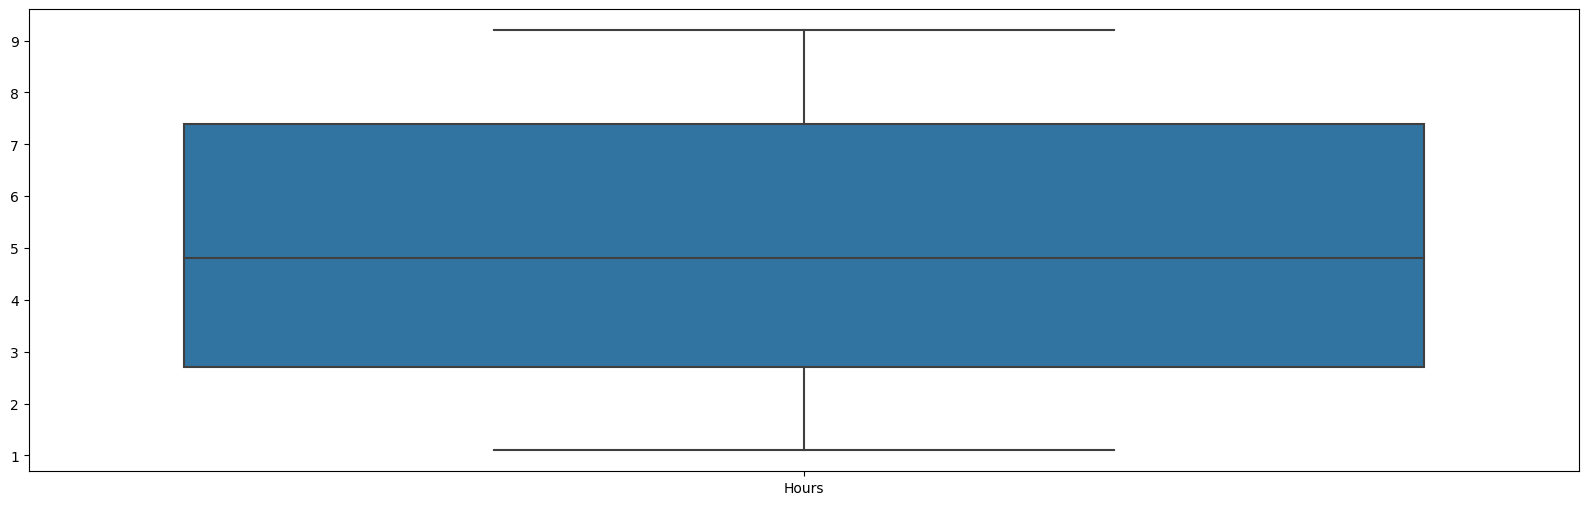

In [45]:
# Plantando um boxplot para identiicação de outliers em Hours
plt.figure(figsize = (20,6))
sns.boxplot(data = data[["Hours"]])

<Axes: >

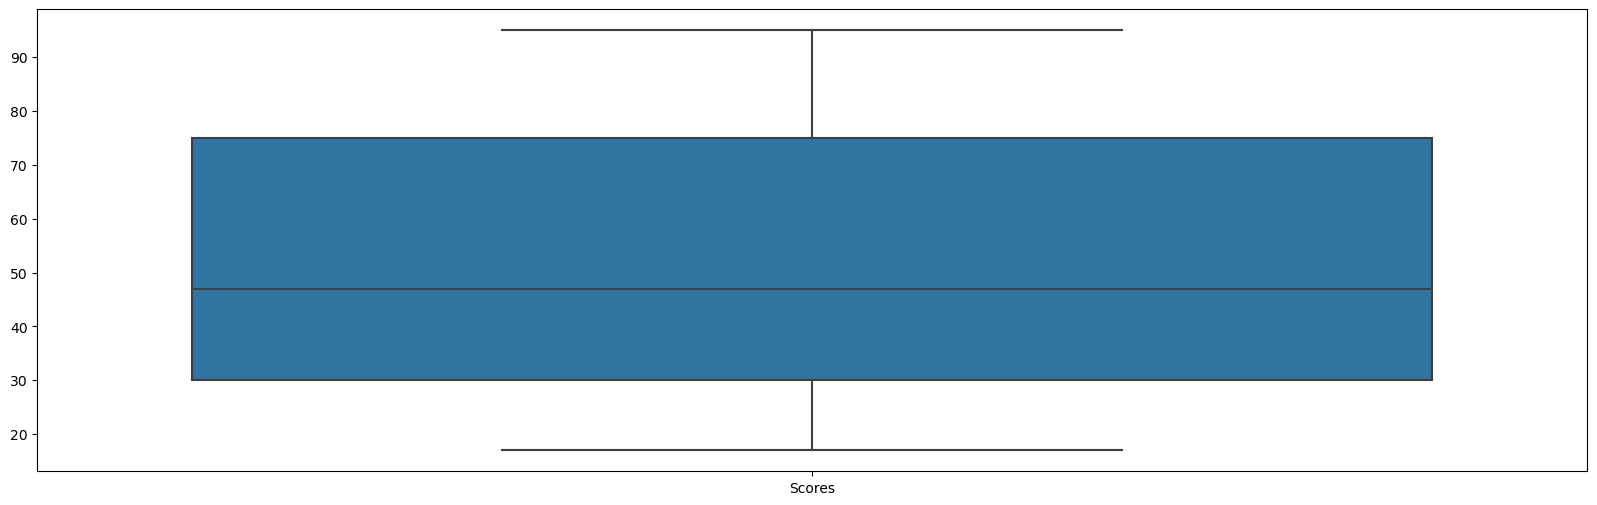

In [46]:
# Plantando um boxplot para identiicação de outliers em Scores
plt.figure(figsize = (20,6))
sns.boxplot(data = data[["Scores"]])

## Aplicando o método do cotovelo

In [47]:
# Calculando a distância média até o centróide em todos os pontos de dados
distortions = []
K = range(1,10)
for k in K:
   kmeanModel = KMeans(n_clusters=k, n_init=10).fit(data)
   kmeanModel.fit(data)
   distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

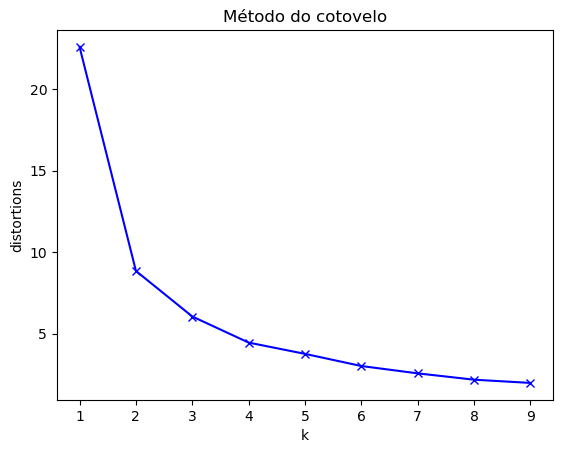

In [48]:
# Plotando o cotovelo
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortions')
plt.title('Método do cotovelo')
plt.show()

## Implementando K-Means

In [49]:
# Criando modelo com 3 grupos de estudante
k=3
model = KMeans(n_clusters=k, n_init=10)
model.fit(data)

KMeans(n_clusters=3, n_init=10)

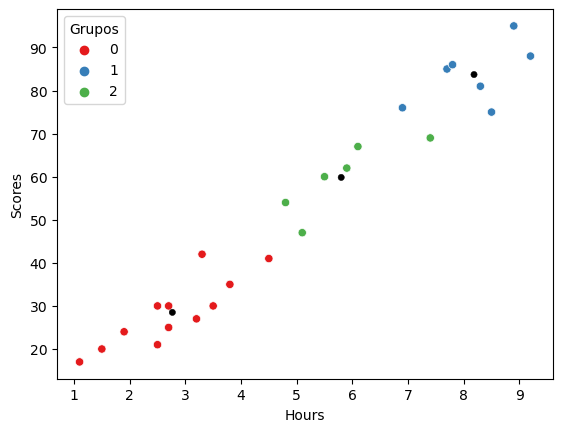

In [50]:
# Exibindo resultado
labels = model.labels_
data['Grupos'] = labels
ax = sns.scatterplot(x = data['Hours'], y = data['Scores'], hue=data['Grupos'], palette='Set1')
ax = sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], hue=range(k), palette=["black", "black", "black"], s=20, ec='black', legend=False, ax=ax)
plt.show()